# EXPLORING THE DATA

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pymysql
from sqlalchemy import create_engine
from scipy.stats import ttest_ind

In [2]:
'''The first I noticed when I arrive in Holland was : hey! The Dutch sure like their beer!
Ofcourse, I could only thank Heineken for that so far...
the second thing I noticed was their terrible weather... How can they 
even go outside, and most importantly, how can they drink their beer!
(I certainly need sun for that!)
So, I could help but wonder about the average 'Kees/Dieuwertje' drinking
behavior and wanted to see if I could find better understand it with data

First, let's look at the place of Beer in the Dutch total alcoholic beverage consumption
'''

"The first I noticed when I arrive in Holland was : hey! The Dutch sure like their beer!\nOfcourse, I could only thank Heineken for that so far...\nthe second thing I noticed was their terrible weather... How can they \neven go outside, and most importantly, how can they drink their beer!\n(I certainly need sun for that!)\nSo, I could help but wonder about the average 'Kees/Dieuwertje' drinking\nbehavior and wanted to see if I could find better understand it with data\n\nFirst, let's look at the place of Beer in the Dutch total alcoholic beverage consumption\n"

## PLACE OF BEER AMONG ALCOHOLIC DRINKS IN NL

In [3]:
#Read
share = pd.read_csv('data/share_beer.csv')
share.head()


,Entity,Year,Wine_pct_total_alcohol,Beer_pct_total_alcohol,Spirits_pct_total_alcohol
0,Netherlands,1964,9,48,43
1,Netherlands,1984,22,49,29
2,Netherlands,2014,35,48,17


Text(0.5, 1.0, 'PLACE OF BEER AMONG TOTAL ALCOHOLIC BEVERAGES')

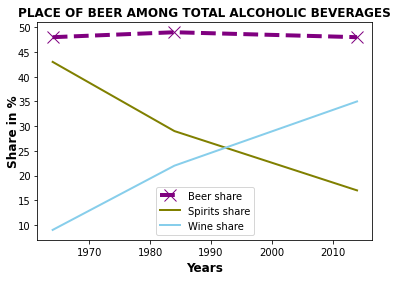

In [4]:
#Plot 
plt.plot('Year','Beer_pct_total_alcohol',data=share,marker='x', markerfacecolor='blue', markersize=12, color='purple',linestyle='dashed', linewidth=4,label="Beer share")
plt.plot( 'Year', 'Spirits_pct_total_alcohol', data=share, marker='', color='olive', linewidth=2,label="Spirits share")
plt.plot( 'Year', 'Wine_pct_total_alcohol' , data=share, marker='', color='skyblue', linewidth=2, label="Wine share")
plt.ylabel('Share in %', fontweight='bold', fontsize='12', verticalalignment='center')
plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')
plt.tick_params(axis='x')




plt.legend()
plt.title('PLACE OF BEER AMONG TOTAL ALCOHOLIC BEVERAGES',fontweight='bold')

In [5]:
#Analysis
''' I took 3 years as reference, parted by 20 years to anlayze the share 
of the beer consumption in The Netherlands throughout the years.
This indication is not per capita but tells the proportion
of beer consumption among the total alcoholic beverage consumption
The original source presents these trends as 5-year averages 64, 84 and 2014 being the last year
of the range

These proportions shows that whilst the Total consumption of Wine seems to present an increase, and 
the cnsumption of Spirits a decrease, the share of beer consumption seem quite 
the same in The Netherlands. This supports the original thought about the Dutch 'liking their beer'

Let's looks further into the possible reasons that can makes us better understand the Dutch
beer-drinking pattern'''

" I took 3 years as reference, parted by 20 years to anlayze the share \nof the beer consumption in The Netherlands throughout the years.\nThis indication is not per capita but tells the proportion\nof beer consumption among the total alcoholic beverage consumption\nThe original source presents these trends as 5-year averages 64, 84 and 2014 being the last year\nof the range\n\nThese proportions shows that whilst the Total consumption of Wine seems to present an increase, and \nthe cnsumption of Spirits a decrease, the share of beer consumption seem quite \nthe same in The Netherlands. This supports the original thought about the Dutch 'liking their beer'\n\nLet's looks further into the possible reasons that can makes us better understand the Dutch\nbeer-drinking pattern"

In [6]:
#Transition line
''' Remember the second next thing I noticed about this country... yes, the weather.
Looking at this graph, I cannot help but wondering: does th eweather plays a role in the 
beer consumption at all? By the look at this one can only wonder if the
Dutch drink because the weather is crap. Le'ts find out
'''

" Remember the second next thing I noticed about this country... yes, the weather.\nLooking at this graph, I cannot help but wondering: does th eweather plays a role in the \nbeer consumption at all? By the look at this one can only wonder if the\nDutch drink because the weather is crap. Le'ts find out\n"

## CONSUMPTION vs. WEATHER

In [10]:
#Read
beer = pd.read_csv('data/beer_NL.csv')
weather = pd.read_csv('data/weather_NL.csv')

beer.head()

,Entity,Year,Consumption,L_Beer
0,Netherlands,1961,1.88,37.6
1,Netherlands,1962,1.96,39.2
2,Netherlands,1963,2.20,44.0
3,Netherlands,1964,2.45,49.0
4,Netherlands,1965,2.59,51.8


<AxesSubplot:xlabel='Year'>

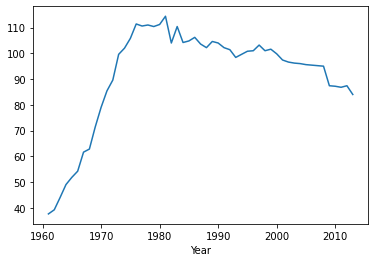

In [32]:
#Plot
beer.set_index('Year')['L_Beer'].plot()

<AxesSubplot:xlabel='Year'>

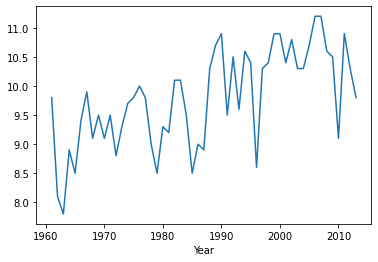

In [31]:
weather.set_index('Year')['AVGTemp_Year'].plot()

<AxesSubplot:xlabel='Year'>

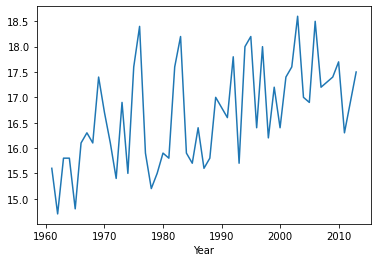

In [30]:
weather.set_index('Year')['AVGTemp_Summer'].plot()

In [ ]:
#bar plot for the rain

In [29]:
# x1= beer['Year']
# y1 =beer['L_Beer']
# x2 = weather['Year']
# y2 = weather['AVGTemp_Year']

# fig,plot = plt.subplots(2,2)

# plt.sca(plot[0])
# plt.plot(x1,y1,ls='--', label='Beer consumption')
# plt.set_title('Beer consumption')
# plt.set_xlabel('Years')
# plt.set_ylabel('consumption in L of beer')

# plt.sca(plot[1])
# plt.plot(weather['Year'],weather['AVGTemp_Year'],ls='',label="AVG Temp")
# plt.set_title('Average temperature per Year')
# plt.set_xlabel('Years')
# plt.set_ylabel('Temp in deg. Celsius')

# plt.sca(plot[2])
# plt.plot( weather['Year'], weather['Qty_precipitation'],label="Qty_Precipitation")
# plt.set_title('Rainy days per Year')
# plt.set_xlabel('Years')
# plt.set_ylabel('Precipitation in mm')

# plt.sca(plot[3])
# plt.plot( weather['Year'], weather['AVGTemp_Summer'] , label="Wine share")
# plt.set_title('Average Summer temperature per year')
# plt.set_xlabel('Years')
# plt.set_ylabel('Temp in Deg. Celsius')


# # plt.ylabel('Share in %', fontweight='bold', fontsize='12', verticalalignment='center')
# # plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')
# # plt.tick_params(axis='x')


# plt.legend()
# plt.title('COMPARING DRINKING BEHAVIOR AGAINST WEATHER',fontweight='bold')

# plt.show()

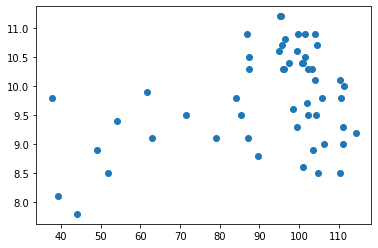

In [13]:
plt.scatter( beer['L_Beer'],weather['AVGTemp_Year'])

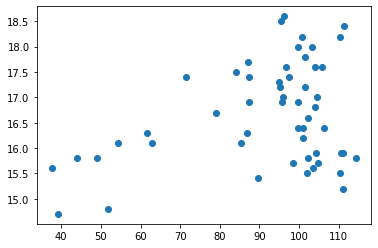

In [19]:
plt.scatter( beer['L_Beer'],weather['AVGTemp_Summer'])

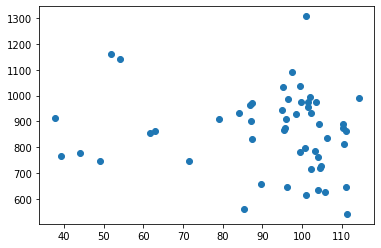

In [16]:
plt.scatter( beer['L_Beer'],weather['Qty_precipitation'])

In [ ]:
#Analysis
#First I would like to calcutate some correlations:
print('Corr AVG temp vs. Beer :',weather['AVGTemp_Year'].corr(beer['L_Beer']) )
print('Corr AVG temp Winter vs. Beer :',weather['AVGTemp_Winter'].corr(beer['L_Beer'])  )
print('Corr AVG temp Summer vs. Beer :',weather['AVGTemp_Summer'].corr(beer['L_Beer'])  )

print('Corr Qty_precipitation vs. Beer :',weather['Qty_precipitation'].corr(beer['L_Beer']) )
print('Corr Nb_SummerDays vs. Beer :',weather['Nb_SummerDays'].corr(beer['L_Beer']) )
print('Corr Hours_Sunshine vs. Beer :',weather['Hours_Sunshine'].corr(beer['L_Beer']) )


In [ ]:
''' From the graphs, we cannot really see much of a strong relation.
From the Correlation calculations we see a relation between Summer/Summer Days and beer as well a negative 
one (though not strong as I thought it would be) between Precipitation and beer
So let's test our hypothesis:

Do the summerdays have an effect on the Dutch beer-drinking? Does the rain? Do the weather in general?
'''


In [61]:
#Hypothesis1
#H0: Summer has no effect
#H1: Summer has an effect

stat, pv = ttest_ind(weather['AVGTemp_Year'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)




stat: -29.879907862592283
P-value: 1.707199148659483e-34


In [60]:
#Hypothesis 2
#H0: Rain has no effect
#H1: Rain has an effect

stat, pv = ttest_ind(weather['Qty_precipitation'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)



stat: 35.72741399909758
P-value: 4.116066838068686e-39


In [59]:
#Hypothesis 3
#H0: Weather in general has no effect
#H1: Weather in general has no effect

stat, pv = ttest_ind(weather['AVGTemp_Year'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)



stat: -29.879907862592283
P-value: 1.707199148659483e-34


In [ ]:
#Transition line:
''' It was nice to confirm that weather in general has some kind of relation to the beer drinking pattern but 
I have often hear that: Dutch are close to their money you know, 'Het geld groeit niet op mijn rug'. 
If this is true, can we see a relation between for ex. price variation and beer?
'''

# QUICK ANALYSIS OF PRICES

In [36]:
#Read
prices = pd.read_csv('data/Prices.csv')
beerCPI = pd.read_csv('data/Beer_CPI.csv')
breadCPI = pd.read_csv('data/Bread_CPI.csv')
cheeseCPI = pd.read_csv('data/MCE_CPI.csv')

Text(0.5, 1.0, 'COMPARING PRICE in TIME')

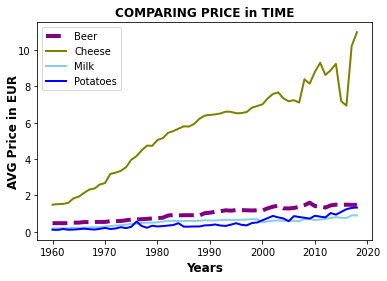

In [44]:
#Plot
plt.plot('Year','Beer_EUR',data=prices, color='purple',linestyle='dashed', linewidth=4,label="Beer")
plt.plot( 'Year', 'Cheese_EUR', data=prices,  color='olive', linewidth=2,label="Cheese")
plt.plot( 'Year', 'Milk_EUR' , data=prices, color='skyblue', linewidth=2, label="Milk")
plt.plot( 'Year', 'Potatoes_EUR', data=prices,color='blue', linewidth=2, label="Potatoes")
plt.ylabel('AVG Price in EUR', fontweight='bold', fontsize='12', verticalalignment='center')
plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')


plt.legend()
plt.title('COMPARING PRICE in TIME',fontweight='bold')

In [ ]:
'''Well, what can we say: Dutch like cheese...
But apart from that and from a first glance at this graph of the price of the fixed basket of 
goods such as beer/cheese, Milk, we can see that
beer is situates among (and even above) daily like products such as Potatoes and 
Milk.
this is teling us that the Dutch people are paying in average of their avergae basket
consumption, the same or even slightly higher price for their beer

Of course this data does not take in consideration the quality of the products in time, so let's 
look at the price index for these products to see their variation
please note that whilst there is a price index for beer alone as a subvategory of
product, CBS has not one for potatos.
Chesse milk are in the same category.I have assumed that the Dutch people have
an equally need for potatos than for bread, therefore I have added CPI of bread

It is also important to note that the data found is only for the period 
1996-2019. I took it and analyze it as is (even though the range is moved, but just for the purpose
of understanding the variation of the price change)
'''

Text(0.5, 1.0, 'CPI Beer, Bread, Cheese')

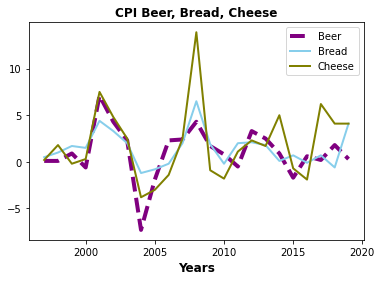

In [54]:
#Analysis
'''I was curious to compare it to the consumper price index for these goods
and see the inflation on their respective prices. this just gives me an idea of 
the importance that beer can have in the daily consumer basket of
an average Dutch
'''

plt.plot('Year','Y0Y_changeD%',data=beerCPI, color='purple',linestyle='dashed', linewidth=4,label="Beer")
plt.plot( 'Year', 'YoY_change%', data=breadCPI,  color='skyblue', linewidth=2,label="Bread")
plt.plot( 'Year', 'YoY_change%' , data=cheeseCPI, color='olive', linewidth=2, label="Cheese")

plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')


plt.legend()
plt.title('CPI Beer, Bread, Cheese',fontweight='bold')

In [58]:
#I would like to quickly test my hypothesis based on fixed prices 
#to answer whether prices have an influence on consumption

#H0: Average price of beer has no affect 
#H1: it has an effect


stat, pv = ttest_ind(prices['Beer_EUR'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)
#The P value seems very low. Price doesn't seem to matter when it comes to beer

stat: -33.11743778006099
P-value: 1.2229083117551503e-36


In [ ]:
'''So if money matters for the Dutch, as the expression wants to make us think about,
but the prices don't seem to be a strong influence, can perhaps the unemployment be a factor? 
'''

# CONSUMPTION vs. UNEMPLOYMENT

In [ ]:
#Read

In [ ]:
#Plot

In [ ]:
#Analysis



total = unemp_rate.loc[(unemp_rate['Gender']== 'Mannen en vrouwen')]
total['Pct'].max()
total['Pct'].mean()
unemp_rate.loc[(unemp_rate['Gender']=='Mannen en vrouwen')&(unemp_rate['Pct']> 5)

In [ ]:
#I am looking to see where can I spot where the max amount of beer was consumed.
#It seems to be around the year 1980

BC_max = dataNL['BeerConsumption'].max()
dataNL.loc[dataNL['BeerConsumption']==BC_max]

#I am checking what the reasons for this could be, Can it be due to the weather?
#and why does it seem to decrease rapidly and then decrease slowly

#Average temperature is high but not the highest. AVG Temp winter is by far not the lowest
#cn this be the reason?

In [ ]:
#is definitely not the mildest winter
Winter_max = dataNL['Winter_min'].max()
dataNL.loc[dataNL['Winter_min']==Winter_max]

In [ ]:
## PLOTTING 

In [ ]:
dataNL.set_index('Year')['BeerConsumption'].plot()

#1980 Beatrix coronation -Worst manifestations the country has had(during peace times) 
#1960-75 economic boom after the war until oil crisis
#oil crisis 73-79 =>'plateau' from 1975
#1982 NL not in the world cup => not reflected hier
#1981 NL in worldcup but not reflected hier 
#oil crisis 2008


#taux de chomage 

<AxesSubplot:xlabel='Year'>

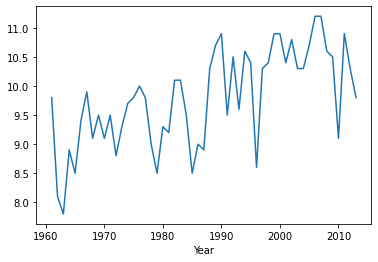